In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keyss import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

Performing API Calls

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#testing calls with a partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'https://api.openweathermap.org/data/2.5/weather?appid=b98fd8090c4f8319b7fd0fe3ed3bc2da&units=metric&q='

In [4]:
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.9, 'feels_like': -21.9, 'temp_min': -14.9, 'temp_max': -14.9, 'pressure': 1000, 'humidity': 61, 'sea_level': 1000, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 44, 'gust': 3.49}, 'clouds': {'all': 90}, 'dt': 1665451175, 'sys': {'country': 'GL', 'sunrise': 1665404050, 'sunset': 1665434064}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}


In [5]:
# set up lists to hold reponse info

city_name = []
country = []
date = []
cloudiness = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

#data record count 
record_count = 1

#According to starter code output
print("""Beginning Data Retrieval
---------------------------------""")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    print('Processing Record ' + str(record_count) + ' of ' + str(len(cities)) + ' | ' + city)
    
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    
    except KeyError:
        print(" City not found. Skipping... ")
        
    #increase for each loop
    record_count += 1

#print end of log
print("""---------------------------------
Data Retrieval Complete
---------------------------------""")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of 649 | hermanus
Processing Record 2 of 649 | margate
Processing Record 3 of 649 | hobart
Processing Record 4 of 649 | codrington
Processing Record 5 of 649 | avarua
Processing Record 6 of 649 | san vicente
Processing Record 7 of 649 | albany
Processing Record 8 of 649 | ponta do sol
Processing Record 9 of 649 | punta arenas
Processing Record 10 of 649 | tabiauea
 City not found. Skipping... 
Processing Record 11 of 649 | khatanga
Processing Record 12 of 649 | arlit
Processing Record 13 of 649 | provideniya
Processing Record 14 of 649 | mehamn
Processing Record 15 of 649 | mount gambier
Processing Record 16 of 649 | komsomolskiy
Processing Record 17 of 649 | carballo
Processing Record 18 of 649 | illoqqortoormiut
 City not found. Skipping... 
Processing Record 19 of 649 | fare
Processing Record 20 of 649 | nuevo casas grandes
Processing Record 21 of 649 | kodiak
Processing Record 22 of 649 | barcelona
Proce

Processing Record 195 of 649 | quang ngai
Processing Record 196 of 649 | laguna
Processing Record 197 of 649 | sentyabrskiy
 City not found. Skipping... 
Processing Record 198 of 649 | henties bay
Processing Record 199 of 649 | tual
Processing Record 200 of 649 | yaan
Processing Record 201 of 649 | suoyarvi
Processing Record 202 of 649 | neiafu
Processing Record 203 of 649 | lagos
Processing Record 204 of 649 | makakilo city
Processing Record 205 of 649 | khonuu
 City not found. Skipping... 
Processing Record 206 of 649 | ixtapa
Processing Record 207 of 649 | clyde river
Processing Record 208 of 649 | dieppe
Processing Record 209 of 649 | hobyo
Processing Record 210 of 649 | kaka
Processing Record 211 of 649 | tutoia
Processing Record 212 of 649 | flin flon
Processing Record 213 of 649 | yellowknife
Processing Record 214 of 649 | jabinyanah
Processing Record 215 of 649 | quatre cocos
Processing Record 216 of 649 | waterloo
Processing Record 217 of 649 | bilma
Processing Record 218 of 6

Processing Record 384 of 649 | watsa
Processing Record 385 of 649 | amapa
Processing Record 386 of 649 | erzin
Processing Record 387 of 649 | marsa matruh
Processing Record 388 of 649 | sisimiut
Processing Record 389 of 649 | waipawa
Processing Record 390 of 649 | chegdomyn
Processing Record 391 of 649 | palmito
Processing Record 392 of 649 | bambous virieux
Processing Record 393 of 649 | grand gaube
Processing Record 394 of 649 | price
Processing Record 395 of 649 | zeya
Processing Record 396 of 649 | makueni
Processing Record 397 of 649 | bokspits
 City not found. Skipping... 
Processing Record 398 of 649 | kirkuk
Processing Record 399 of 649 | keti bandar
Processing Record 400 of 649 | deputatskiy
Processing Record 401 of 649 | shizunai
Processing Record 402 of 649 | luoyang
Processing Record 403 of 649 | qinhuangdao
Processing Record 404 of 649 | sur
Processing Record 405 of 649 | mareeba
Processing Record 406 of 649 | atambua
Processing Record 407 of 649 | turayf
Processing Record

Processing Record 579 of 649 | kasempa
Processing Record 580 of 649 | bagdarin
Processing Record 581 of 649 | batagay-alyta
Processing Record 582 of 649 | guarapari
Processing Record 583 of 649 | betsiamites
Processing Record 584 of 649 | sladkovo
Processing Record 585 of 649 | pelotas
Processing Record 586 of 649 | townsville
Processing Record 587 of 649 | marquard
Processing Record 588 of 649 | north bend
Processing Record 589 of 649 | vera cruz
Processing Record 590 of 649 | ames
Processing Record 591 of 649 | chongwe
Processing Record 592 of 649 | guanhaes
Processing Record 593 of 649 | wanaka
Processing Record 594 of 649 | clinton
Processing Record 595 of 649 | ranong
Processing Record 596 of 649 | bunia
Processing Record 597 of 649 | satitoa
 City not found. Skipping... 
Processing Record 598 of 649 | poso
Processing Record 599 of 649 | vigrestad
Processing Record 600 of 649 | ljubovija
Processing Record 601 of 649 | ruteng
Processing Record 602 of 649 | kazalinsk
 City not found

In [6]:
#Dictionary to put into dataframe then csv
weather_py_dict = {
                    "City": city_name,
                    "Lat": latitude,
                    "Lng": longitude,
                    "Max Temp": max_temp,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date
}

weather_py_df = pd.DataFrame(weather_py_dict)
weather_py_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,19.40,60,99,5.41,ZA,1665451179
1,Margate,51.3813,1.3862,12.05,73,16,1.34,GB,1665450810
2,Hobart,-42.8794,147.3294,17.81,63,75,2.57,AU,1665451180
3,Codrington,-38.2667,141.9667,17.86,62,100,6.66,AU,1665451180
4,Avarua,-21.2078,-159.7750,25.03,73,75,9.26,CK,1665451181
5,San Vicente,-26.6167,-54.1333,13.32,100,96,0.61,AR,1665451139
6,Albany,42.6001,-73.9662,8.74,92,3,1.50,US,1665450930
7,Ponta do Sol,32.6667,-17.1000,22.78,70,10,2.68,PT,1665451181
8,Punta Arenas,-53.1500,-70.9167,6.06,75,75,4.12,CL,1665451182
9,Khatanga,71.9667,102.5000,-13.74,95,90,1.13,RU,1665451182


In [8]:
#toCSV
weather_py_df.to_csv('weather_py_dict.csv', index=False)

In [7]:
#Inspect the data and remove the cities where the humidity > 100%.
over_hundred_humidity = weather_py_df[weather_py_df["Humidity"] > 100]
over_hundred_humidity # No cities where the humidity was greater than 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


Plotting the Data

C:\Users\amudd\AppData\Local\Temp\ipykernel_16648\1820664733.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f"City Latitude vs. Max Temperature ({str(pd.datetime.now().date())})")


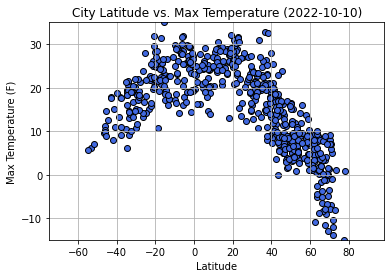

In [12]:
#Latitude vs Temperature Scatter

plt.scatter(weather_py_df["Lat"], weather_py_df["Max Temp"], marker="o", facecolors='royalblue', edgecolors="black")

plt.title(f"City Latitude vs. Max Temperature ({str(pd.datetime.now().date())})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#limits for each axis
plt.xlim(min(weather_py_df["Lat"])-20, max(weather_py_df["Lat"])+20)
plt.ylim(min(weather_py_df["Max Temp"]), max(weather_py_df["Max Temp"]))
plt.grid("True")
plt.savefig('saved output graphs/City Latitude vs. Max Temperature.png')

plt.show()


The scatter plot here analyzes the trend of temperature in F over the latitiude points across the map(cities) dependent on the distance away from the equator There seems to be a strong correlation between the two variables

C:\Users\amudd\AppData\Local\Temp\ipykernel_16648\3423407478.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f"City Latitude vs. Humidity ({str(pd.datetime.now().date())})")


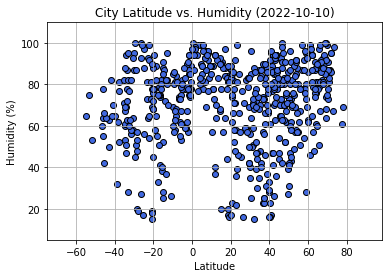

In [11]:
#Latitude vs Humidity Scatter

plt.scatter(weather_py_df["Lat"], weather_py_df["Humidity"], marker="o", facecolors='royalblue', edgecolors="black")

plt.title(f"City Latitude vs. Humidity ({str(pd.datetime.now().date())})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#limits for each axis
plt.xlim(min(weather_py_df["Lat"])-20, max(weather_py_df["Lat"])+20)
plt.ylim(min(weather_py_df["Humidity"])-10, max(weather_py_df["Humidity"])+10)
plt.grid("True")

plt.savefig('saved output graphs/City Latitude vs. Humidity.png')

plt.show()


The scatter plot here analyzes the trend of humidity in % over the latitiude points across the map. 
This scatter plot seems to show no correlation between humidity levels and latitude on both hemispheres but high levels of humidity closer to the equator

C:\Users\amudd\AppData\Local\Temp\ipykernel_16648\3214588322.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f"City Latitude vs. Cloudiness ({str(pd.datetime.now().date())})")


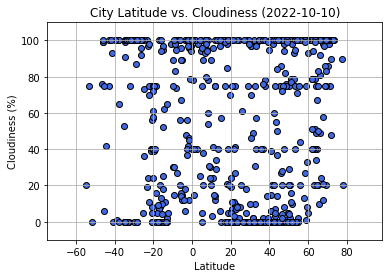

In [10]:
#Latitude vs. Cloudiness Plot

plt.scatter(weather_py_df["Lat"], weather_py_df["Cloudiness"], marker="o", facecolors='royalblue', edgecolors="black")

plt.title(f"City Latitude vs. Cloudiness ({str(pd.datetime.now().date())})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#limits for each axis
plt.xlim(min(weather_py_df["Lat"])-20, max(weather_py_df["Lat"])+20)
plt.ylim(min(weather_py_df["Cloudiness"])-10, max(weather_py_df["Cloudiness"])+10)
plt.grid("True")

plt.savefig('saved output graphs/City Latitude vs. Cloudiness .png')
plt.show()



the scatterplot here shows no correlation between the two variables

C:\Users\amudd\AppData\Local\Temp\ipykernel_16648\4060936920.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f"City Latitude vs. Wind Speed ({str(pd.datetime.now().date())})")


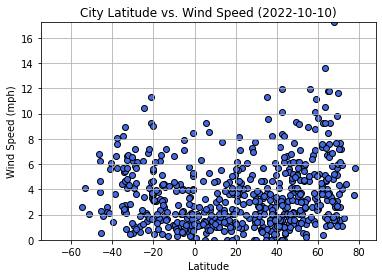

In [13]:
#Latitude vs. Wind Speed Plot

plt.scatter(weather_py_df["Lat"], weather_py_df["Wind Speed"], marker="o", facecolors='royalblue', edgecolors="black")

plt.title(f"City Latitude vs. Wind Speed ({str(pd.datetime.now().date())})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#limits for each axis
plt.xlim(min(weather_py_df["Lat"])-20, max(weather_py_df["Lat"])+10)
plt.ylim(min(weather_py_df["Wind Speed"]), max(weather_py_df["Wind Speed"]))
plt.grid("True")

plt.savefig('saved output graphs/City Latitude vs. Wind Speed.png')
plt.show()

This scatter plot shows that there is a cluster of lower wind speed closer to the equator. Wind speed is generally low but outliers at the top of the graph shows that wind gains speed further away from the equator, but with little to no correlation. 

Linear Regression

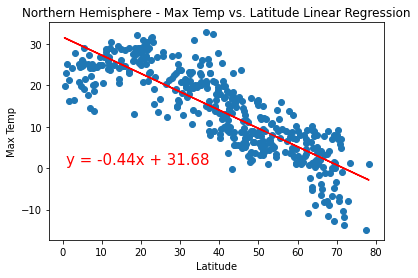

In [17]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

weather_data_nh = weather_py_df[weather_py_df["Lat"] >= 0]

x_values = weather_data_nh["Lat"]
y_values = weather_data_nh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig('saved output graphs/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

In this linear regression graph we can see a strong negative correlation between max temp and latitude on the NH. Max temp lowers further away from the equator. Vice versa is also true as you reach lower altitudes the max temp increases. 

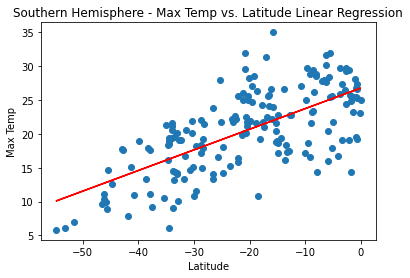

In [23]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

weather_data_sh = weather_py_df[weather_py_df["Lat"] < 0]

x_values = weather_data_sh["Lat"]
y_values = weather_data_sh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig('saved output graphs/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

As opposed to the above graph, there is a weak positive correlation between max temp and latitude in the SH. As you get closer to the equator (which is increasing in this graph) max temp also increases but not nearly as enough as compared the above graph. 

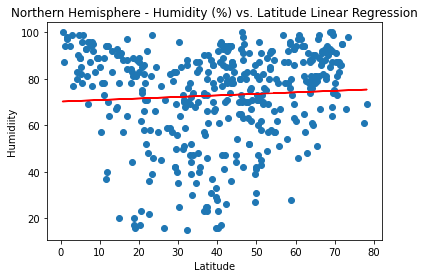

In [19]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = weather_data_nh["Lat"]
y_values = weather_data_nh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidiity')

plt.savefig('saved output graphs/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

This linear regressed graph shows a weak postiive correlation between the two variables. Humidity levels increasing slightly as indicated by the smaller slope. 

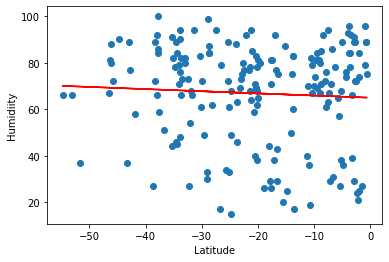

In [18]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = weather_data_sh["Lat"]
y_values = weather_data_sh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidiity')

plt.savefig('saved output graphs/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

This graph displays a weak negative correlation between the two variables. Humidity decreases but ever so slightly

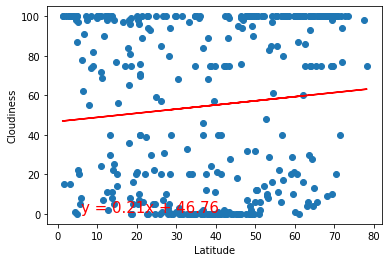

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = weather_data_nh["Lat"]
y_values = weather_data_nh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('saved output graphs/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

This graph displays a very weak psotiive correlation between the two variables. There is possibly no correlations as all markers on the graphs are scattered determining no influence between the two variables. 

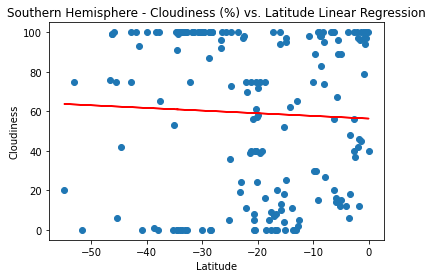

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = weather_data_sh["Lat"]
y_values = weather_data_sh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('saved output graphs/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

This graphs displays a weak positive correlation between the two variables. As shown in the above graph latitude does not seem to affect cloudiness in both hemispheres

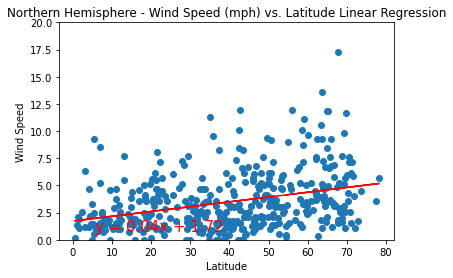

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = weather_data_nh["Lat"]
y_values = weather_data_nh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.ylim(0,20)

plt.savefig('saved output graphs/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

This model shows a very low, almost no correlation between the two variables

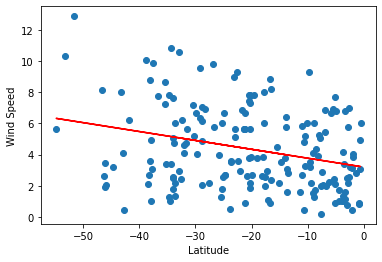

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = weather_data_sh["Lat"]
y_values = weather_data_sh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig('saved output graphs/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

There is a very low negative correlation between the two variables. Wind speed seems lower very slightly as we approach the equator